In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import shutil

import wfdb
from wfdb import processing

%matplotlib inline

## Reading records and annotations

In [2]:
record_id = '16265'
segment_len = 2000
start=2000
end=start+segment_len
record_path = '../nsrDb/'+record_id

In [3]:
# Demo 1 - Read a wfdb record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord(record_path, sampfrom=start, sampto=end) 

#wfdb.plot_wfdb(record=record, annotation=annotation,
#               title='Record 16265',
#               time_units='seconds', figsize=(10,20))

print(record.__dict__)

{'record_name': '16265', 'n_sig': 2, 'fs': 128, 'counter_freq': None, 'base_counter': None, 'sig_len': 2000, 'base_time': datetime.time(8, 4, 15, 625000), 'base_date': None, 'comments': ['32 M'], 'sig_name': ['ECG1', 'ECG2'], 'p_signal': array([[-0.175, -0.025],
       [-0.175, -0.005],
       [-0.175,  0.005],
       ...,
       [-0.855,  0.005],
       [-0.645, -0.225],
       [ 0.605, -0.505]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['16265.dat', '16265.dat'], 'fmt': ['212', '212'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [200.0, 200.0], 'baseline': [0, 0], 'units': ['mV', 'mV'], 'adc_res': [12, 12], 'adc_zero': [0, 0], 'init_value': [-35, -5], 'checksum': [41720, 34766], 'block_size': [0, 0]}


In [4]:
raw = record.__dict__['p_signal'][:,0] #Take only 1st channel - ECG1
fs = record.fs
print(fs)
print(raw.shape)
print(raw)

128
(2000,)
[-0.175 -0.175 -0.175 ... -0.855 -0.645  0.605]


## Write record into .csv file

In [5]:
time = np.linspace(0, segment_len/fs, segment_len)
print(len(time))
time

2000


array([0.00000000e+00, 7.81640820e-03, 1.56328164e-02, ...,
       1.56093672e+01, 1.56171836e+01, 1.56250000e+01])

In [6]:
file = pd.DataFrame()
file['timestamp'] = time
file['ecg_measurement'] = raw
file

,timestamp,ecg_measurement
0,0.000000,-0.175
1,0.007816,-0.175
2,0.015633,-0.175
3,0.023449,-0.175
4,0.031266,-0.215
5,0.039082,-0.185
6,0.046898,-0.155
7,0.054715,-0.195
8,0.062531,-0.175
9,0.070348,-0.175


In [7]:
file_name = '/tmp/nsrDb_' + record_id + '_' + str(start) + '.csv'
file.to_csv(file_name, index=False)

## Peak detection with `qrs_detector` from c-labpl

In [8]:
import sys
sys.path.insert(0, '/home/singuyen/Study/biosignal/project/c-labpl.qrs_detector.master')

from QRSDetectorOffline import QRSDetectorOffline

qrs peaks indices
[  44  123  203  283  364  445  528  612  697  780  863  947 1035 1119
 1201 1283 1366 1447 1528 1607 1687 1767 1846 1926]
noise peaks indices
[]


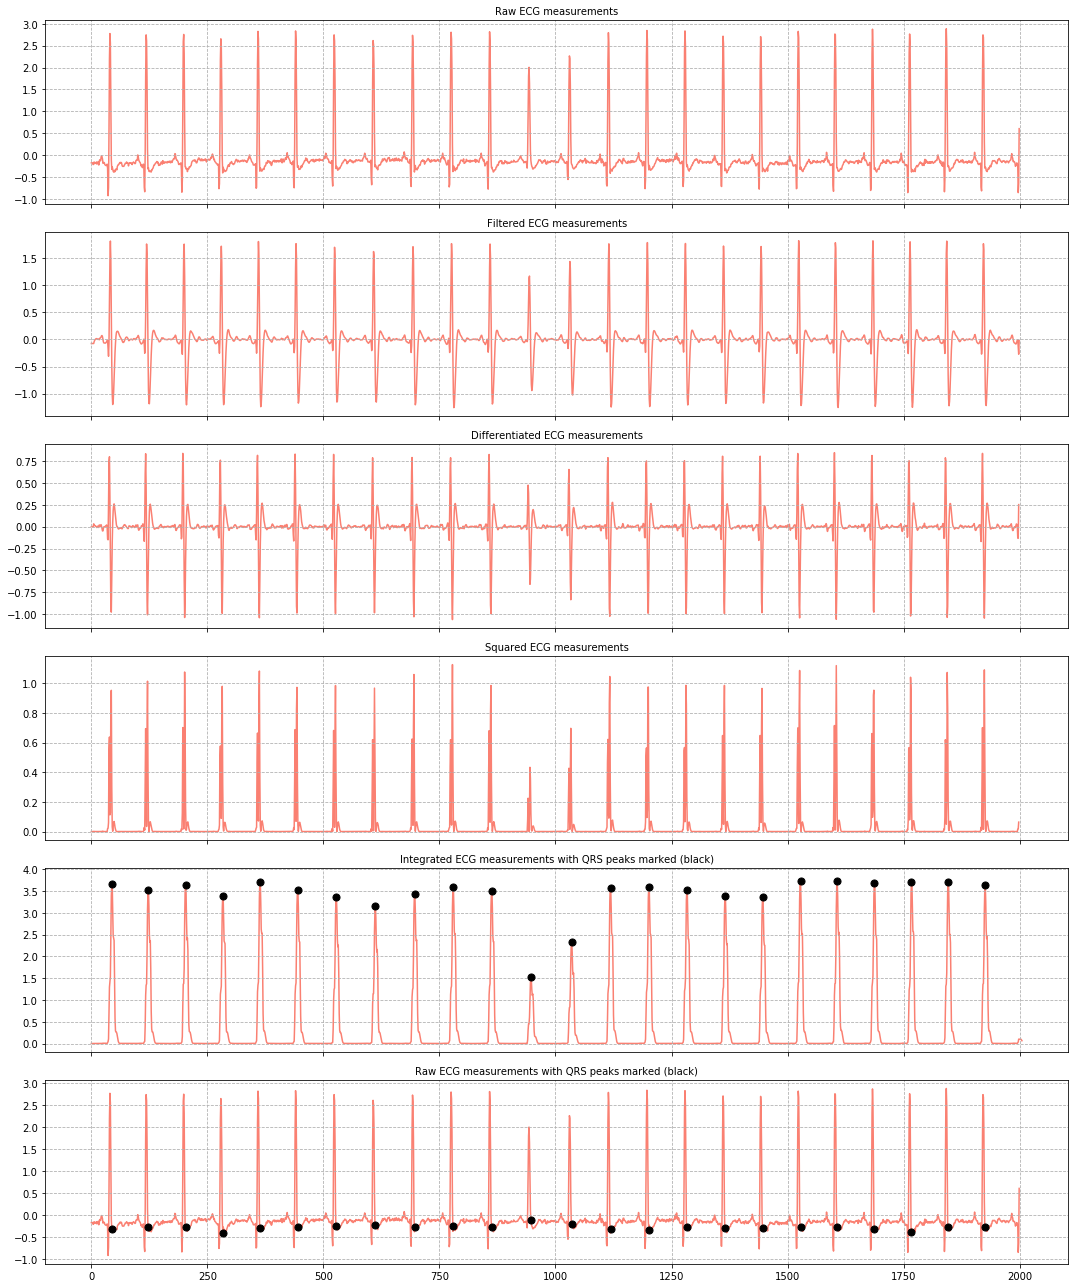

In [9]:
qrs_detector = QRSDetectorOffline(ecg_data_path=file_name, fs=fs, verbose=True,
                                  log_data=True, plot_data=True, show_plot=True)

## Validation

In [10]:
detected_inds = qrs_detector.qrs_peaks_indices
detected_inds

array([  44,  123,  203,  283,  364,  445,  528,  612,  697,  780,  863,
        947, 1035, 1119, 1201, 1283, 1366, 1447, 1528, 1607, 1687, 1767,
       1846, 1926])

In [11]:
detected_inds + start

array([2044, 2123, 2203, 2283, 2364, 2445, 2528, 2612, 2697, 2780, 2863,
       2947, 3035, 3119, 3201, 3283, 3366, 3447, 3528, 3607, 3687, 3767,
       3846, 3926])

In [12]:
annotation = wfdb.rdann(record_path, 'atr', sampfrom=start, sampto=end)
annotation.sample

array([2038, 2117, 2197, 2278, 2357, 2438, 2522, 2606, 2691, 2774, 2856,
       2941, 3029, 3113, 3195, 3277, 3360, 3441, 3522, 3601, 3681, 3761,
       3840, 3920, 4000])

In [13]:
# Compare detected qrs complexes to reference annotation.
# Note, first sample in atr is not a qrs.
comparitor = processing.compare_annotations(ref_sample = annotation.sample[1:],
                                            test_sample = detected_inds+start,
                                            window_width = int(0.1 * fs),
                                            signal = raw)

# Print the results
comparitor.print_summary()

25 reference annotations, 24 test annotations

True Positives (matched samples): 24
False Positives (unmatched test samples: 0
False Negatives (unmatched reference samples): 1

Specificity: 0.9600 (24/25)
Positive Predictivity: 1.0000 (24/24)
False Positive Rate: 0.0000 (0/24)
